In [1]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [3]:
# Load our image - this should be a new frame since last time!
binary_warped = mpimg.imread('warped-example.jpg')
binary_warped.shape

(720, 1280)

In [4]:
binary_warped

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

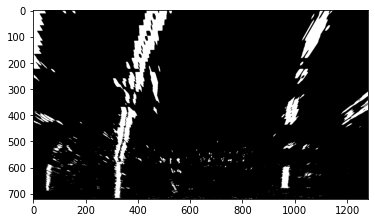

In [5]:
plt.imshow(binary_warped, cmap = 'gray')

In [7]:
left_fit = np.array([ 2.17600453e-04, -3.87364172e-01, 4.78000379e+02])
right_fit = np.array([ 4.22146855e-04, -4.80877497e-01, 1.11530271e+03])

In [8]:
def fit_poly(img_shape, leftx, lefty, rightx, righty):
    ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
#     left_fit = None
#     right_fit = None
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
#     print('left_fit', left_fit)
#     print('right_fit', right_fit)
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
#     left_fitx = None
#     right_fitx = None
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]    
        
    return left_fitx, right_fitx, ploty

In [10]:
margin = 100

# Grab activated pixels
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])

In [11]:
binary_warped.shape[0]

720

In [16]:
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for current_y in range(binary_warped.shape[0]):
    
    leftx_current = left_fit[0]*current_y**2 + left_fit[1]*current_y + left_fit[2]
    rightx_current = right_fit[0]*current_y**2 + right_fit[1]*current_y + right_fit[2]        
    
    win_xleft_low = int(np.max([leftx_current - margin, 0]))
    win_xleft_high = int(np.min([leftx_current + margin, binary_warped.shape[1]]))
    win_xright_low = int(np.max([rightx_current - margin, 0]))
    win_xright_high = int(np.min([rightx_current + margin, binary_warped.shape[1]]))
#     print(current_y, (win_xleft_low, win_xleft_high), (win_xright_low, win_xright_high))

    ### TO-DO: Identify the nonzero pixels in x and y within the window ###
    # good_left_inds = None
    # good_right_inds = None

    good_left_inds = []
    good_right_inds = []
    for i in range(len(nonzeroy)):    
        y = nonzeroy[i]
        x = nonzerox[i]

        if y == current_y:
            if (win_xleft_low <= x) & (x <= win_xleft_high):
                good_left_inds.append([y, x])
            if (win_xright_low <= x) & (x <= win_xright_high):            
                good_right_inds.append([y, x])  

    # Append these indices to the lists
    if len(good_left_inds) > 0:
        left_lane_inds.append(good_left_inds)
    if len(good_right_inds) > 0:
        right_lane_inds.append(good_right_inds)


left_lane_inds = np.concatenate(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

# Extract left and right line pixel positions
# leftx = nonzerox[left_lane_inds]
# lefty = nonzeroy[left_lane_inds] 
# rightx = nonzerox[right_lane_inds]
# righty = nonzeroy[right_lane_inds]

leftx = left_lane_inds[:, 1]
lefty = left_lane_inds[:, 0]

rightx = right_lane_inds[:, 1]
righty = right_lane_inds[:, 0]

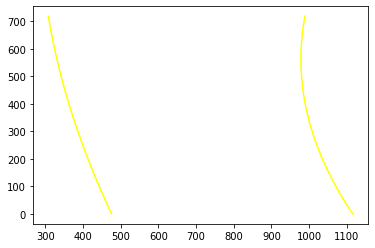

In [17]:
left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)

## Visualization ##
# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped))*255
window_img = np.zeros_like(out_img)
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, 
                          ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))
right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, 
                          ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

# Draw the lane onto the warped blank image
cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)

# Plot the polynomial lines onto the image
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')

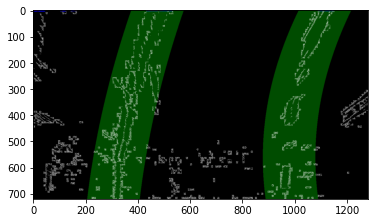

In [18]:
plt.imshow(result)

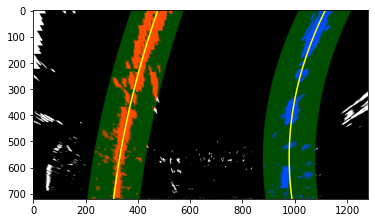

In [32]:
import cv2
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Load our image - this should be a new frame since last time!
binary_warped = mpimg.imread('warped-example.jpg')

# Polynomial fit values from the previous frame
# Make sure to grab the actual values from the previous step in your project!
left_fit = np.array([ 2.17600453e-04, -3.87364172e-01, 4.78000379e+02])
right_fit = np.array([ 4.22146855e-04, -4.80877497e-01, 1.11530271e+03])

def fit_poly(img_shape, leftx, lefty, rightx, righty):
    ### TO-DO: Fit a second order polynomial to each with np.polyfit() ###
#     left_fit = None
#     right_fit = None
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)
#     print('left_fit', left_fit)
#     print('right_fit', right_fit)
    
    # Generate x and y values for plotting
    ploty = np.linspace(0, img_shape[0]-1, img_shape[0])
    ### TO-DO: Calc both polynomials using ploty, left_fit and right_fit ###
#     left_fitx = None
#     right_fitx = None
    left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
    right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]    
        
    return left_fitx, right_fitx, ploty

def search_around_poly(binary_warped):
    # HYPERPARAMETER
    # Choose the width of the margin around the previous polynomial to search
    # The quiz grader expects 100 here, but feel free to tune on your own!
    margin = 100

    # Grab activated pixels
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    
    ### TO-DO: Set the area of search based on activated x-values ###
    ### within the +/- margin of our polynomial function ###
    ### Hint: consider the window areas for the similarly named variables ###
    ### in the previous quiz, but change the windows to our new search area ###
    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for current_y in range(binary_warped.shape[0]):

        leftx_current = left_fit[0]*current_y**2 + left_fit[1]*current_y + left_fit[2]
        rightx_current = right_fit[0]*current_y**2 + right_fit[1]*current_y + right_fit[2]        

        win_xleft_low = int(np.max([leftx_current - margin, 0]))
        win_xleft_high = int(np.min([leftx_current + margin, binary_warped.shape[1]]))
        win_xright_low = int(np.max([rightx_current - margin, 0]))
        win_xright_high = int(np.min([rightx_current + margin, binary_warped.shape[1]]))
    #     print(current_y, (win_xleft_low, win_xleft_high), (win_xright_low, win_xright_high))

        ### TO-DO: Identify the nonzero pixels in x and y within the window ###
        # good_left_inds = None
        # good_right_inds = None

        good_left_inds = []
        good_right_inds = []
        for i in range(len(nonzeroy)):    
            y = nonzeroy[i]
            x = nonzerox[i]

            if y == current_y:
                if (win_xleft_low <= x) & (x <= win_xleft_high):
                    good_left_inds.append([y, x])
                if (win_xright_low <= x) & (x <= win_xright_high):            
                    good_right_inds.append([y, x])  

        # Append these indices to the lists
        if len(good_left_inds) > 0:
            left_lane_inds.append(good_left_inds)
        if len(good_right_inds) > 0:
            right_lane_inds.append(good_right_inds)


    left_lane_inds = np.concatenate(left_lane_inds)
    right_lane_inds = np.concatenate(right_lane_inds)

    # Extract left and right line pixel positions
    # leftx = nonzerox[left_lane_inds]
    # lefty = nonzeroy[left_lane_inds] 
    # rightx = nonzerox[right_lane_inds]
    # righty = nonzeroy[right_lane_inds]

    leftx = left_lane_inds[:, 1]
    lefty = left_lane_inds[:, 0]

    rightx = right_lane_inds[:, 1]
    righty = right_lane_inds[:, 0]
    


    # Fit new polynomials
    left_fitx, right_fitx, ploty = fit_poly(binary_warped.shape, leftx, lefty, rightx, righty)
    
    ## Visualization ##
    # Create an image to draw on and an image to show the selection window
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    window_img = np.zeros_like(out_img)
    # Color in left and right line pixels
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]

    # Generate a polygon to illustrate the search window area
    # And recast the x and y points into usable format for cv2.fillPoly()
    left_line_window1 = np.array([np.transpose(np.vstack([left_fitx-margin, ploty]))])
    left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx+margin, ploty])))])
    left_line_pts = np.hstack((left_line_window1, left_line_window2))
    
    right_line_window1 = np.array([np.transpose(np.vstack([right_fitx-margin, ploty]))])
    right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx+margin, ploty])))])
    right_line_pts = np.hstack((right_line_window1, right_line_window2))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(window_img, np.int_([left_line_pts]), (0,255, 0))
    cv2.fillPoly(window_img, np.int_([right_line_pts]), (0,255, 0))
    result = cv2.addWeighted(out_img, 1, window_img, 0.3, 0)
    
    # Plot the polynomial lines onto the image
    plt.plot(left_fitx, ploty, color='yellow')
    plt.plot(right_fitx, ploty, color='yellow')
    ## End visualization steps ##    
    
    return result

# Run image through the pipeline
# Note that in your project, you'll also want to feed in the previous fits
result = search_around_poly(binary_warped)

# View your output
plt.imshow(result)